In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn .model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
zc=pd.read_csv("zomato.csv")
zc

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
cc= pd.read_excel(r'C:\Users\Dell\Downloads\Country-Code.xlsx')
cc

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
zc.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
zf = pd.merge(zc, cc, on='Country Code')

In [6]:
zf.shape

(9551, 22)

In [7]:
zf.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
zf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
zf.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [10]:
zf.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [11]:
zf.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [12]:
zf.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<Axes: >

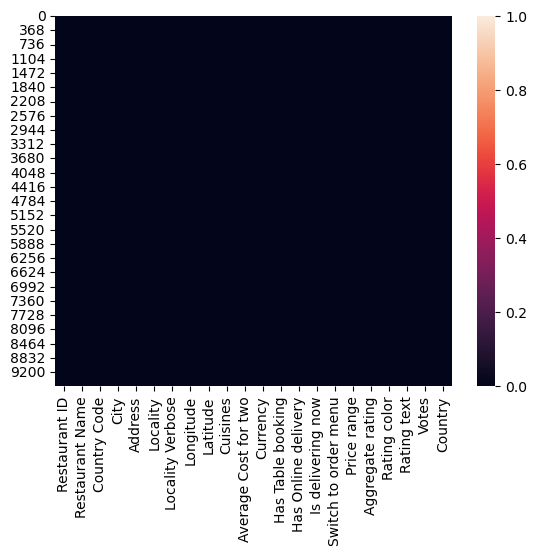

In [13]:
sns.heatmap(zf.isnull())

In [14]:
zf = zf.drop(['Address', 'Currency', 'Restaurant ID', 'Country'], axis=1)

In [15]:
zf.head()

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

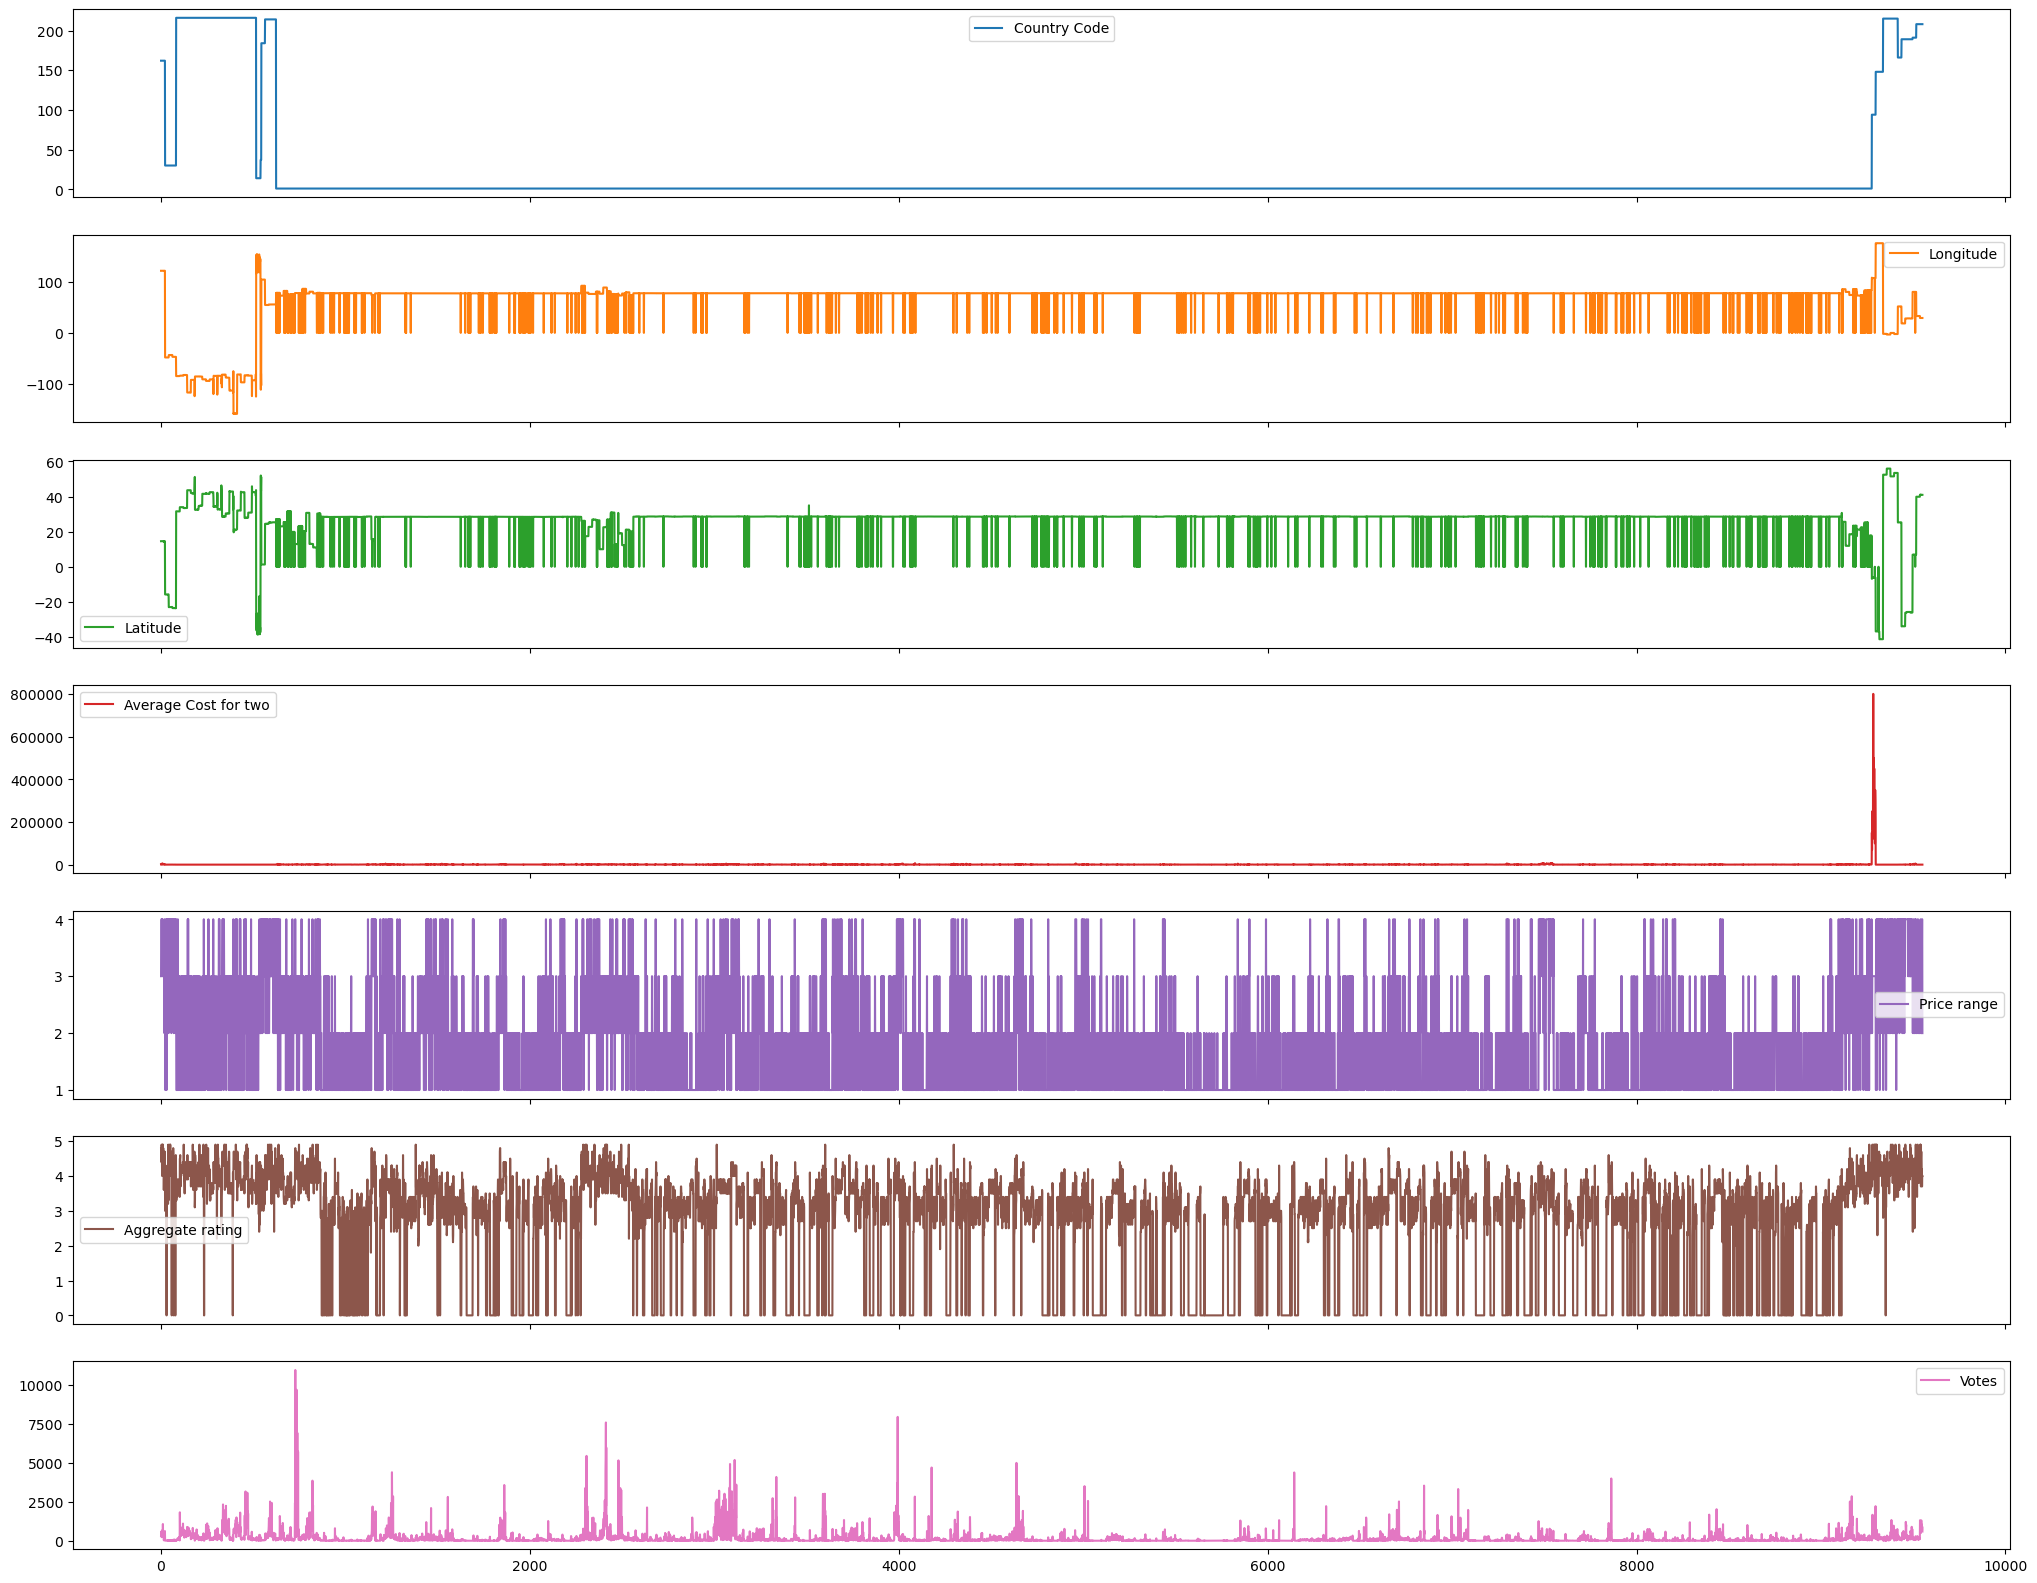

In [16]:
zf.plot(subplots=True, figsize=(25,20))

array([[<Axes: title={'center': 'Country Code'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Average Cost for two'}>,
        <Axes: title={'center': 'Price range'}>,
        <Axes: title={'center': 'Aggregate rating'}>],
       [<Axes: title={'center': 'Votes'}>, <Axes: >, <Axes: >]],
      dtype=object)

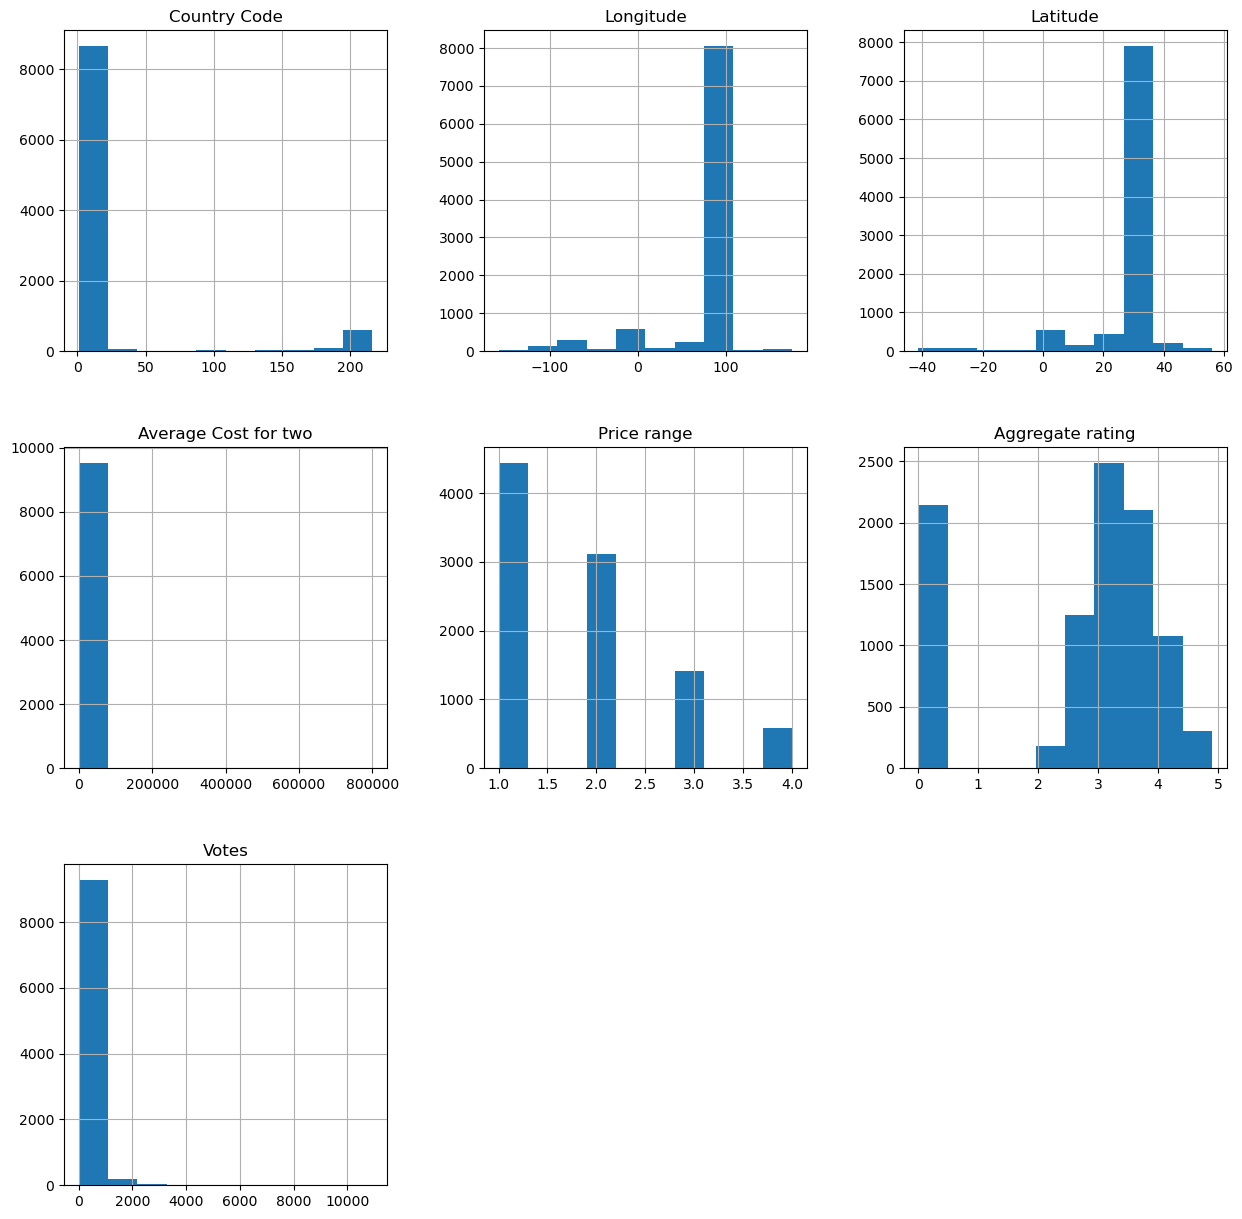

In [17]:
zf.hist(bins=10,figsize=(15,15))

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

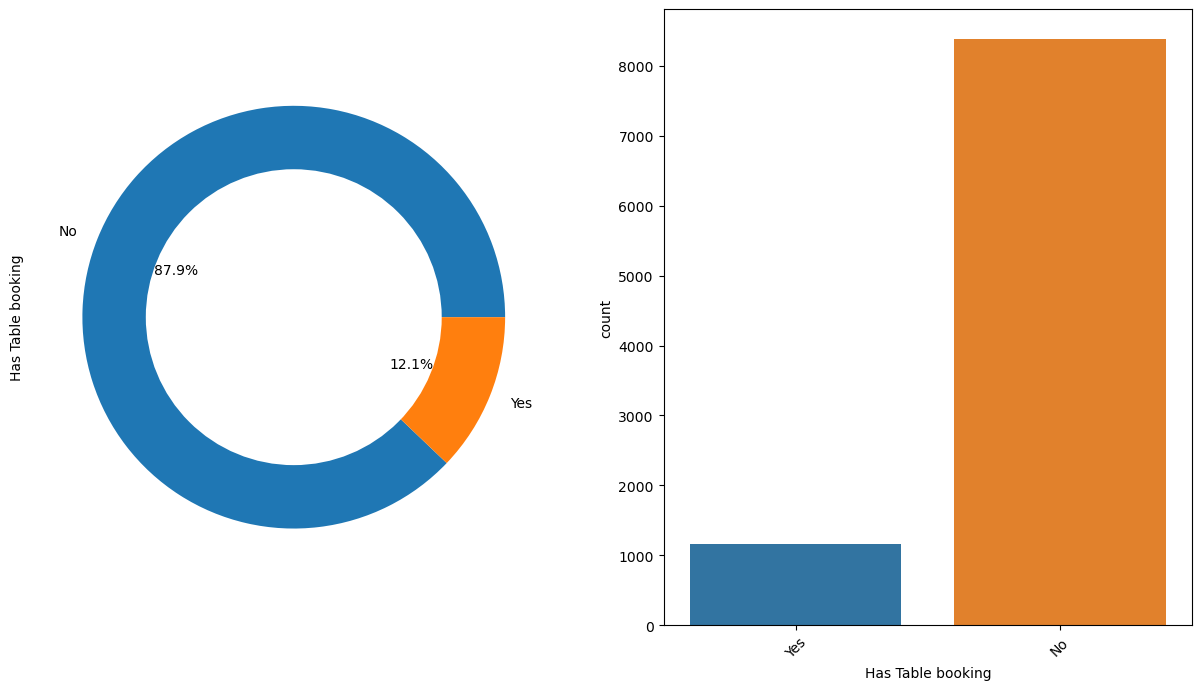

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
zf['Has Table booking'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Has Table booking',data=zf)
plt.xticks(rotation=45)
zf['Has Table booking'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

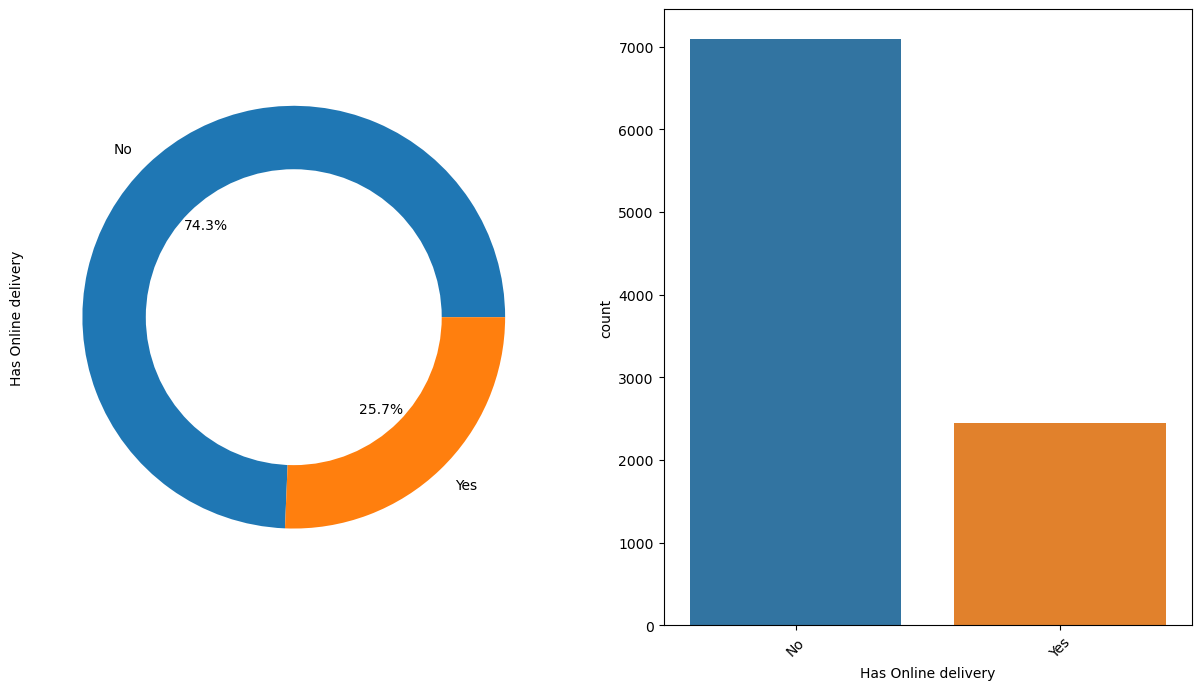

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
zf['Has Online delivery'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Has Online delivery',data=zf)
plt.xticks(rotation=45)
zf['Has Online delivery'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

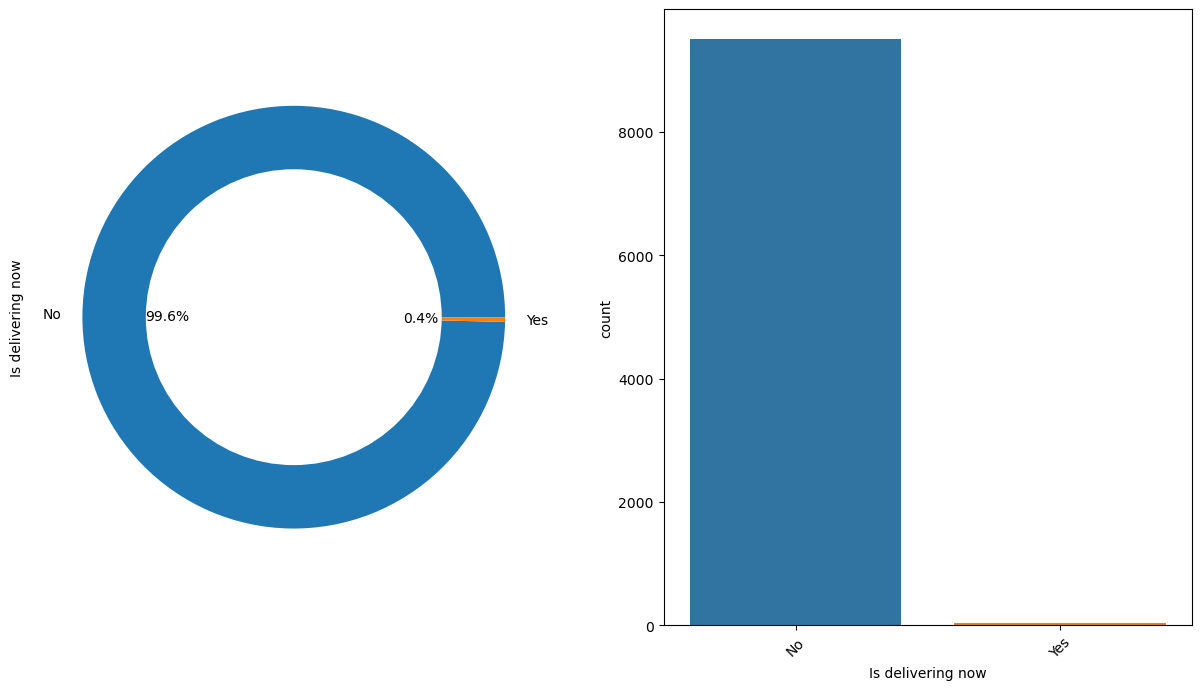

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
zf['Is delivering now'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Is delivering now',data=zf)
plt.xticks(rotation=45)
zf['Is delivering now'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

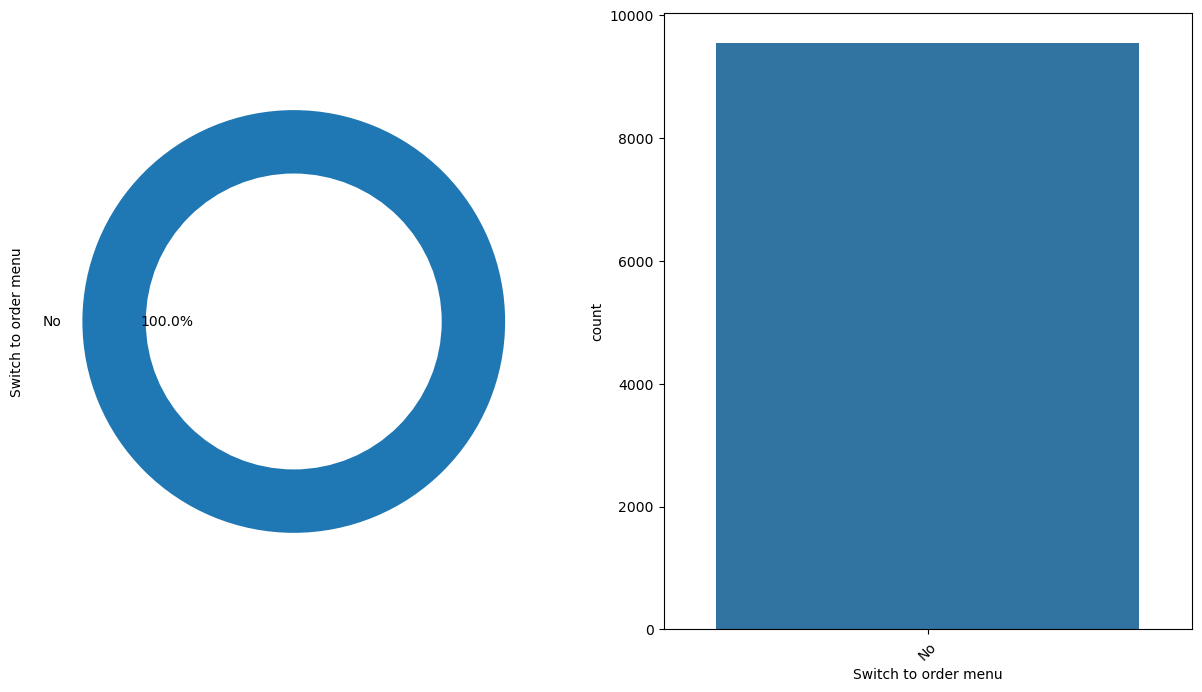

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
zf['Switch to order menu'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Switch to order menu',data=zf)
plt.xticks(rotation=45)
zf['Switch to order menu'].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

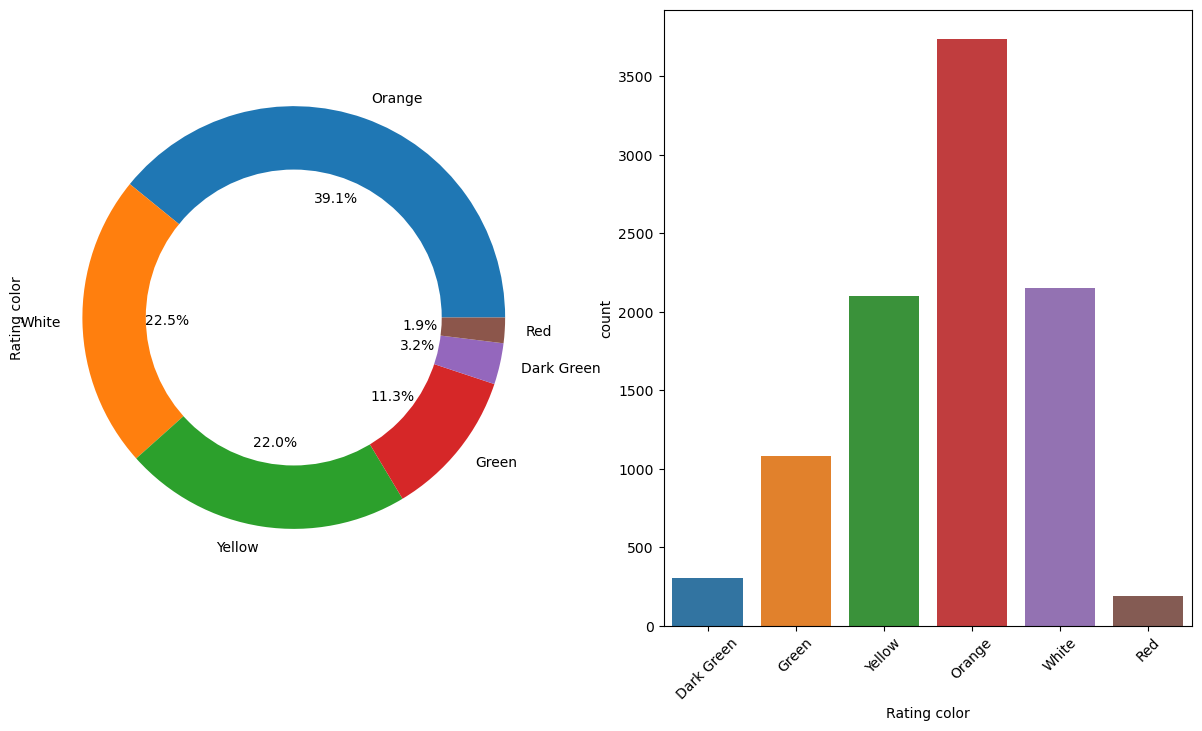

In [22]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
zf['Rating color'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Rating color',data=zf)
plt.xticks(rotation=45)
zf['Rating color'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

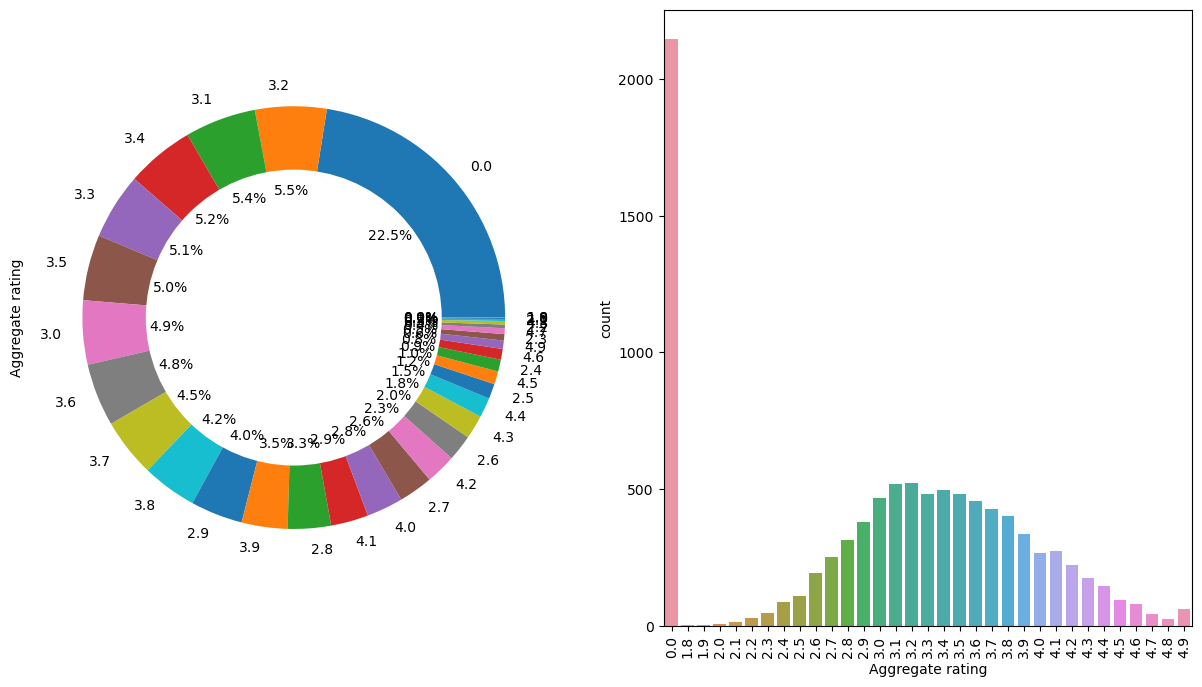

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
zf['Aggregate rating'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Aggregate rating',data=zf)
plt.xticks(rotation=90)
zf['Aggregate rating'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

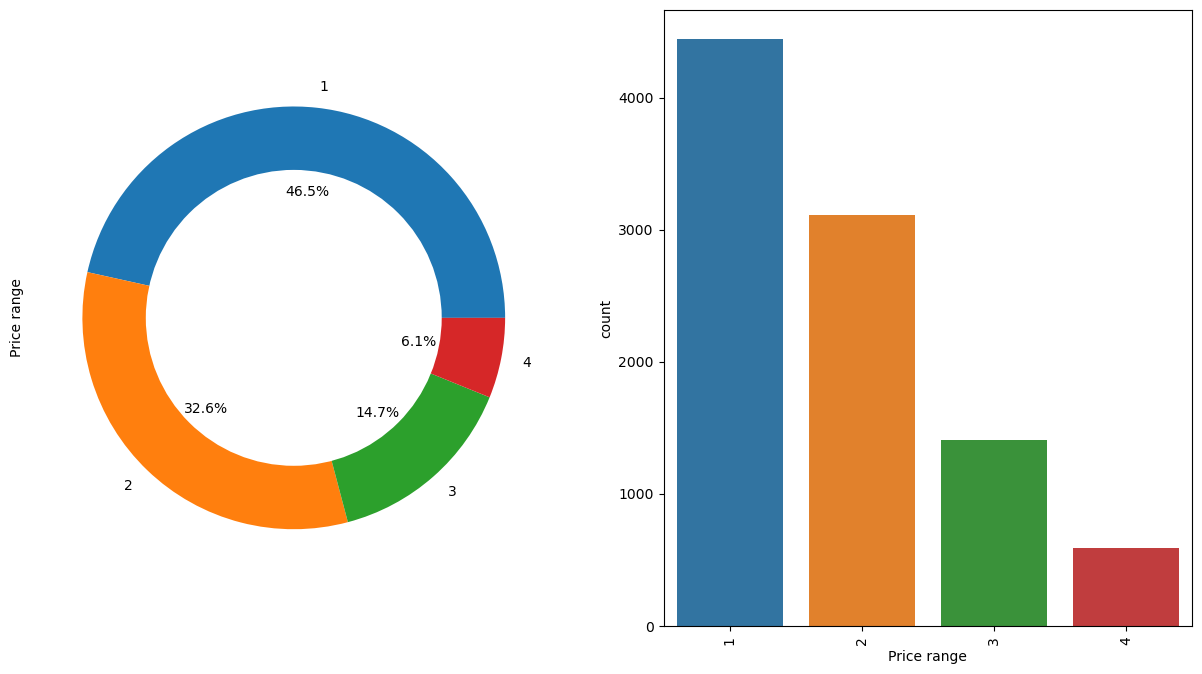

In [24]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
zf['Price range'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Price range',data=zf)
plt.xticks(rotation=90)
zf['Price range'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

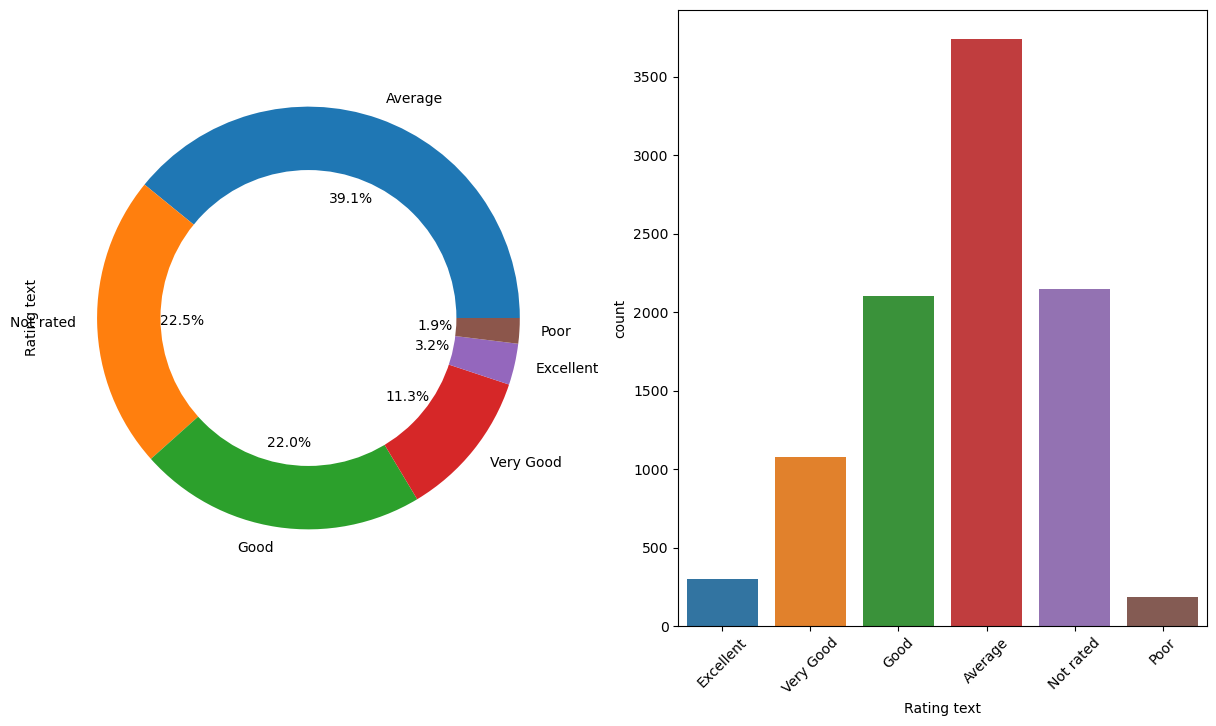

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
zf['Rating text'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Rating text',data=zf)
plt.xticks(rotation=45)
zf['Rating text'].value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

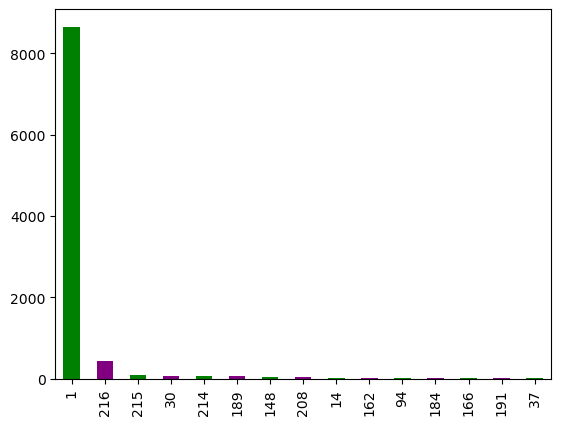

In [26]:
zf['Country Code'].value_counts().plot(kind='bar', color=['green', 'purple'])
zf['Country Code'].value_counts()

# Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
categorical_cols=['Restaurant Name','City', 'Locality', 'Locality Verbose', 'Cuisines', 'Has Table booking', 
                  'Has Online delivery', 'Is delivering now', 'Switch to order menu', 
                  'Rating color' , 'Rating text', 'Longitude', 'Latitude', 'Aggregate rating']
le=LabelEncoder()
for i in zf[categorical_cols]:
    zf[i]=le.fit_transform(zf[i])
zf

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3749,162,73,171,172,8042,384,920,1100,1,0,0,0,3,31,0,1,314
1,3173,162,73,593,601,8041,382,1111,1200,1,0,0,0,3,28,0,1,591
2,2897,162,75,308,314,8053,388,1671,4000,1,0,0,0,4,27,1,5,270
3,4707,162,75,862,875,8050,391,1126,1500,0,0,0,0,4,32,0,1,365
4,5523,162,75,862,875,8055,390,1122,1500,1,0,0,0,4,31,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4443,208,140,517,523,634,8419,1813,80,0,0,0,0,3,24,1,5,788
9547,1311,208,140,552,558,643,8418,1824,105,0,0,0,0,3,25,1,5,1034
9548,3069,208,140,554,561,641,8425,1110,170,0,0,0,0,4,20,5,2,661
9549,513,208,140,554,561,642,8426,1657,120,0,0,0,0,4,23,1,5,901


In [28]:
zf.dtypes

Restaurant Name         int32
Country Code            int64
City                    int32
Locality                int32
Locality Verbose        int32
Longitude               int64
Latitude                int64
Cuisines                int32
Average Cost for two    int64
Has Table booking       int32
Has Online delivery     int32
Is delivering now       int32
Switch to order menu    int32
Price range             int64
Aggregate rating        int64
Rating color            int32
Rating text             int32
Votes                   int64
dtype: object

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

In [30]:
# Average Cost for Two- Model

In [110]:
x = zf.drop(['Average Cost for two'], axis =1)
y = zf['Average Cost for two']

In [109]:
x.shape

(9551, 17)

In [77]:
y.shape

(9551,)

In [78]:
y.value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

In [79]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
xtrain.shape

(7640, 17)

In [81]:
xtest.shape 

(1911, 17)

In [82]:
ytrain.shape

(7640,)

In [83]:
ytest.shape

(1911,)

In [84]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [85]:
pred=lg.predict(xtest)
pred

array([500, 600, 300, ..., 300, 500,  25], dtype=int64)

In [86]:
accuracy_score(pred,ytest)

0.13867085295656725

In [87]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

In [88]:
predsv=sv.predict(xtest)
predsv

array([300, 300, 300, ..., 500, 400,  25], dtype=int64)

In [89]:
print(accuracy_score(ytest,predsv))

0.11983254840397697


In [90]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [91]:
lm.coef_

array([ 6.36555182e-02,  1.37341780e+01, -1.31430953e+01,  8.50025638e-01,
       -6.54125612e-01,  6.96091482e-01, -3.54940546e-01,  6.66627748e-01,
       -1.31223587e+03, -9.28433856e+02,  5.10458269e+02,  4.26325641e-13,
        7.83183778e+02,  4.92344355e+01, -2.10745105e+02,  2.42892372e+02,
        9.81884546e-01])

In [92]:
lm.intercept_

-1952.357450541

In [93]:
lm.score(xtrain,ytrain)

0.025089118410957734

In [94]:
zf.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [95]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [96]:
preddtc=dtc.predict(xtest)
preddtc

array([450, 700, 600, ..., 700, 750,  25], dtype=int64)

In [97]:
print(accuracy_score(ytest,preddtc))

0.28414442700156983


In [98]:
dtr=DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [99]:
preddtr=dtr.predict(xtest)
preddtr

array([ 200.,  500.,  500., ...,  500., 1500.,   25.])

In [100]:
print(accuracy_score(ytest,preddtr))

0.27995813710099426


In [101]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [102]:
predknn=knn.predict(xtest)
predknn

array([200, 350, 100, ..., 200, 450,  25], dtype=int64)

In [103]:
print(accuracy_score(ytest,predknn))

0.1140763997906855


In [104]:
kn=KNeighborsRegressor()
kn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [105]:
predkn=kn.predict(xtest)
predkn

array([860., 990., 360., ..., 240., 700.,  28.])

In [106]:
kn.score(xtrain,ytrain)

0.2485155812895401

In [ ]:
# Price Range- Model

In [111]:
X = zf.drop(['Price range'], axis =1)
Y = zf['Price range']

In [112]:
X.shape

(9551, 17)

In [113]:
Y.shape

(9551,)

In [114]:
Y.value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [115]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [116]:
lg=LogisticRegression()
lg.fit(Xtrain,Ytrain)

LogisticRegression()

In [117]:
pred=lg.predict(Xtest)
pred

array([1, 3, 1, ..., 2, 2, 2], dtype=int64)

In [118]:
accuracy_score(pred,Ytest)

0.716902145473574

In [120]:
svc=SVC()
svc.fit(Xtrain,Ytrain)

SVC()

In [121]:
predsvc=sv.predict(Xtest)
predsvc

array([1, 2, 1, ..., 2, 3, 1], dtype=int64)

In [122]:
print(accuracy_score(Ytest,predsvc))

0.7561486132914704


In [123]:
# Hyperparameter Tuning

In [124]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [125]:
import numpy as np
alpha_min = 0.1
alpha_max = 1
num_values = 10
alphas = np.logspace(np.log10(alpha_min), np.log10(alpha_max), num=num_values)

print("Alpha values:", alphas)

Alpha values: [0.1        0.12915497 0.16681005 0.21544347 0.27825594 0.35938137
 0.46415888 0.59948425 0.77426368 1.        ]


In [128]:
alphavalue = {'alpha': [0.1, 0.12915497, 0.16681005, 0.21544347, 0.27825594, 0.35938137,
 0.46415888, 0.59948425, 0.77426368, 1.]}

model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=alphavalue, cv=5)
grid.fit(X, y)

print("Best score:", grid.best_score_)
print("Best estimator alpha:", grid.best_estimator_.alpha)
print("Best params:", grid.best_params_)

Best score: 1.0
Best estimator alpha: 0.1
Best params: {'alpha': 0.1}


In [127]:
import os

model_file = 'best_model.pkl'
if os.path.exists(model_file):
    print("Best model is saved as", model_file)
else:
    print("Failed to save the model.")

Best model is saved as best_model.pkl


Model Selection and Training
A variety of machine learning models were explored, such as logistic regression, k-neighbors classifier, decision tree regressor and decsion tree classifier. These models were selected for their capacity to handle regression and classification tasks and their flexibility in capturing complex relationships within the data. Prior to training, the dataset was partitioned into training and testing subsets using the train_test_split function from the scikit-learn library, ensuring robust model evaluation and performance assessment.

Hyperparameter Tuning
Hyperparameter tuning was performed for some models to optimize their performance. This process involved selecting the best values for the hyperparameters using techniques such as grid search or randomized search. Evaluation metrics were used to compare different models and select the best-performing one.

Evaluation Metrics
The performance of the trained models was evaluated using appropriate evaluation metrics. These metrics provide insights into how well the models are able to predict the next day maximum and minimum temperature based on the given features.